## The advertising experiment between Social Media Budget and Sales (in Thousands $ ).

#### Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
import scipy.stats as stats

#### Load and data processing

In [3]:
df=pd.read_csv("Marketing_Data.csv")
df.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


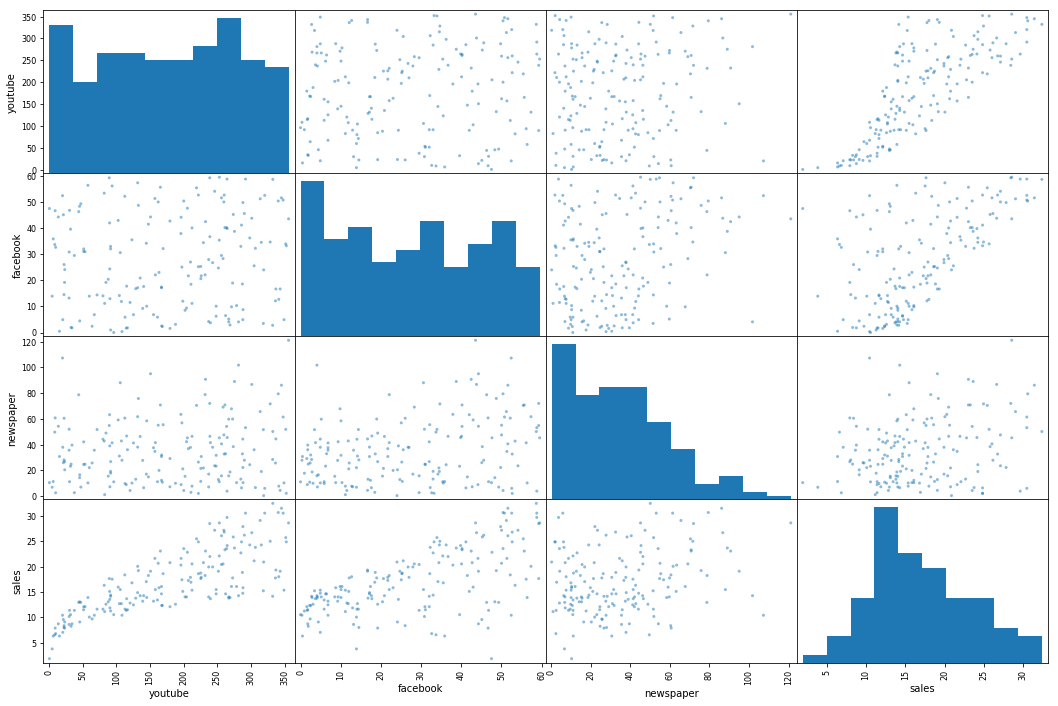

In [4]:
pd.plotting.scatter_matrix(df,figsize=(18,12))
plt.show()

At the figure above we can see plots for every pair of features, on diagonal are histograms of columns. 
Also we can see after this visualization that our features are weakly correlated, only sales with youtube and facebook have visuable positive relationship. Below corelation matrix confirm this conclusions

In [5]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


In [6]:
Y=df["sales"].values
X1=df["youtube"].values
X2=df["facebook"].values
X3=df["newspaper"].values

In [7]:
X=np.column_stack((X1,X2,X3)) # column stack function join three columns from our dataset to one matrix
X=np.c_[np.ones(len(X1)),X] # by this function we can add to matrix X column containing only ones, that's bias 
X

array([[  1.  ,  84.72,  19.2 ,  48.96],
       [  1.  , 351.48,  33.96,  51.84],
       [  1.  , 135.48,  20.88,  46.32],
       [  1.  , 116.64,   1.8 ,  36.  ],
       [  1.  , 318.72,  24.  ,   0.36],
       [  1.  , 114.84,   1.68,   8.88],
       [  1.  , 348.84,   4.92,  10.2 ],
       [  1.  , 320.28,  52.56,   6.  ],
       [  1.  ,  89.64,  59.28,  54.84],
       [  1.  ,  51.72,  32.04,  42.12],
       [  1.  , 273.6 ,  45.24,  38.4 ],
       [  1.  , 243.  ,  26.76,  37.92],
       [  1.  , 212.4 ,  40.08,  46.44],
       [  1.  , 352.32,  33.24,   2.16],
       [  1.  , 248.28,  10.08,  31.68],
       [  1.  ,  30.12,  30.84,  51.96],
       [  1.  , 210.12,  27.  ,  37.8 ],
       [  1.  , 107.64,  11.88,  42.84],
       [  1.  , 287.88,  49.8 ,  22.2 ],
       [  1.  , 272.64,  18.96,  59.88],
       [  1.  ,  80.28,  14.04,  44.16],
       [  1.  , 239.76,   3.72,  41.52],
       [  1.  , 120.48,  11.52,   4.32],
       [  1.  , 259.68,  50.04,  47.52],
       [  1.  , 

#### Linear regression using normal equations

In [83]:
class lin_reg():

    def coef(self, X, Y):
        b=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        return b
    
    def mse(self):
        k=3  #number of features
        n=len(Y) #number of data
        MSE=(Y.T.dot(Y)-Y.T.dot(X.dot(lm.coef(X,Y))))/(n-k-1)
        return MSE
    
    def y_hat(self, X1, X2, X3):
        y_hat=lm.coef(X,Y)[0]+lm.coef(X,Y)[1]*X1+lm.coef(X,Y)[2]*X2+lm.coef(X,Y)[3]*X3  
        return y_hat
    
    def R2score(self):
        R2=np.sum((y_hat-np.mean(Y))**2)/np.sum((Y-np.mean(Y))**2)
        return R2
    
    def Residuals(self):
        eps=Y-y_hat # Subtract predictions from real value of sales
        return eps
        

In [84]:
lm=lin_reg()

In [31]:
print("Coefficients: ", lm.coef(X,Y))

Coefficients:  [3.50587099 0.04523544 0.18839783 0.00427949]


In [32]:
print("Mean squared error: ", lm.mse())
print("Root mean squared error: ", lm.mse()**(1/2))

Mean squared error:  4.039767300704157
Root mean squared error:  2.009917237277236


In [42]:
y_hat=lm.y_hat(X1,X2,X3)
lm.y_hat(12,5,7)  # example of using prediction

5.020641897484869

In [34]:
lm.R2score()

0.900475235853936

As we can see model fitting factor is quite high, so that means we can do next diagnosis.

#### Residuals

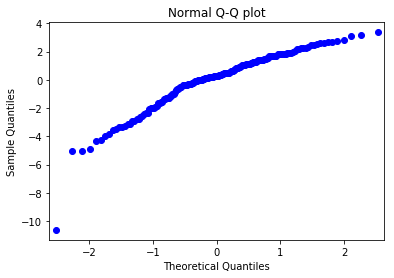

In [85]:
sm.qqplot(lm.Residuals(),dist="norm")
plt.title("Normal Q-Q plot")
plt.show()

We can see that we have outliers in model, we should delete them to improve predictions

In [86]:
print("Minimun: ",min(lm.Residuals()),"Maximum:", max(lm.Residuals()))

Minimun:  -10.621211326331377 Maximum: 3.370077773980798


In [95]:
eps_new=np.delete(lm.Residuals(),np.where(abs(lm.Residuals()) > 3)) # Delete residuals where value is greater than 3 or smaller than -3

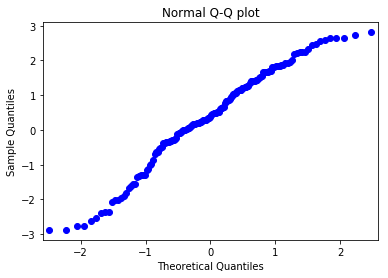

In [96]:
sm.qqplot(eps_new,dist="norm")
plt.title("Normal Q-Q plot")
plt.show()

In [99]:
stats.jarque_bera(lm.Residuals())

(162.79169129912344, 0.0)

In [100]:
stats.jarque_bera(eps_new) # we can see large change of values, it means that eps_new is more from normal distribution than previous version of residuals

(5.971479920310756, 0.05050212016304956)

In [102]:
Y_new=np.delete(Y,np.where(abs(lm.Residuals()) > 3))

#### Variance Inflation Factor 

VIF check collinearity between each columns

In [15]:
vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif

[6.7607314612998515, 1.015705799121826, 1.0977610392773758, 1.1030721188632535]

In [41]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.09e-83
Time:                        13:13:21   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.000       2.717       4.295
x1             0.0452      0.002     29.830      0.000       0.042       0.048
x2             0.1884      0.009     20.895      0.000       0.171       0.206
x3             0.0043      0.007      0.658      0.511      -0.009       0.017
==============================================================================
Omnibus:                       57.934   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.792
Skew:                          -1.388   Prob(JB):                     4.47e-36
Kurtosis:                       6.891   Cond. No.                         544.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""